# Get Python Version

In [1]:
from platform import python_version

print(python_version())

3.7.6


# Import libraries

In [2]:
# Data Manipulation
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model Building
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import pairwise_distances

plt.style.use('ggplot')

# Import dataset

In [3]:
path = 

file = 'medical_clean.xlsx'

med = pd.read_excel(path + file, index_col=0)
med.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


# Rename columns

In [4]:
#replace columns labeled item1, item2, item3, item4, item5, item6, item7, item 8 into valid names

med.rename(columns={'Item1':'timely_admission', 'Item2':'timely_treatment', 'Item3':'timely_visits', 'Item4':'reliability','Item5':'options', 'Item6':'hrsoftx', 'Item7':'courteousstaff', 'Item8':'evidenceactivelistening'}, inplace=True) 
med

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,TotalCharge,Additional_charges,timely_admission,timely_treatment,timely_visits,reliability,options,hrsoftx,courteousstaff,evidenceactivelistening
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,...,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,...,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,...,8276.481000,15281.210000,3,3,3,4,4,2,3,2


# Explore dataset

In [5]:
med.describe()

,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,...,TotalCharge,Additional_charges,timely_admission,timely_treatment,timely_visits,reliability,options,hrsoftx,courteousstaff,evidenceactivelistening
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,1.001400,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,1.008117,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,1.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,2.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,7.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [6]:
#Finding the number of NaNs in each column
med.isna().sum()

Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
ReAdmis                    0
VitD_levels                0
Doc_visits                 0
Full_meals_eaten           0
vitD_supp                  0
Soft_drink                 0
Initial_admin              0
HighBlood                  0
Stroke                     0
Complication_risk          0
Overweight                 0
Arthritis                  0
Diabetes                   0
Hyperlipidemia             0
BackPain                   0
Anxiety                    0
Allergic_rhini

In [7]:
#check for duplicates

med.duplicated().any()

False

In [8]:
med.corr()

,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,...,TotalCharge,Additional_charges,timely_admission,timely_treatment,timely_visits,reliability,options,hrsoftx,courteousstaff,evidenceactivelistening
Zip,1.000000,-0.029327,-0.900683,0.030955,0.011065,-0.005960,0.009404,-0.003151,0.000838,0.012021,...,0.012904,0.003490,-0.005756,-0.002297,-0.009235,-0.001498,0.004776,0.001881,-0.004036,-0.013274
Lat,-0.029327,1.000000,-0.112348,-0.207572,0.006373,-0.007270,-0.019369,0.001493,0.008380,0.003401,...,-0.010759,-0.002283,0.008614,0.007413,0.014326,-0.015594,-0.001424,0.010723,0.009641,0.001733
Lng,-0.900683,-0.112348,1.000000,-0.031979,-0.014114,0.007493,-0.006665,-0.006389,0.000754,-0.014231,...,-0.008830,0.000079,0.004805,-0.002523,-0.000800,0.003508,-0.003296,-0.007443,0.001077,0.009253
Population,0.030955,-0.207572,-0.031979,1.000000,0.002462,-0.018987,0.005426,0.002651,0.012646,-0.025608,...,0.019188,-0.004820,0.014312,0.023612,-0.001248,-0.004660,0.008705,0.008159,0.010034,-0.000220
Children,0.011065,0.006373,-0.014114,0.002462,1.000000,0.009836,0.007176,0.009487,-0.002292,0.003835,...,0.024100,0.013548,0.002138,0.001674,-0.002094,0.000728,0.012564,-0.008546,0.004156,-0.019753
Age,-0.005960,-0.007270,0.007493,-0.018987,0.009836,1.000000,-0.012228,0.010315,0.006898,0.008555,...,0.016876,0.716854,0.005552,0.003967,0.004709,0.003377,-0.008827,-0.002087,0.009423,-0.003367
Income,0.009404,-0.019369,-0.006665,0.005426,0.007176,-0.012228,1.000000,-0.013115,0.013464,-0.011365,...,-0.014345,-0.009825,-0.003494,-0.008182,-0.003782,-0.004301,-0.010642,0.001021,-0.000502,0.021178
VitD_levels,-0.003151,0.001493,-0.006389,0.002651,0.009487,0.010315,-0.013115,1.000000,0.010210,0.023223,...,-0.001403,0.008290,0.013711,0.003979,-0.012103,-0.009872,0.006605,0.006887,-0.009832,-0.021074
Doc_visits,0.000838,0.008380,0.000754,0.012646,-0.002292,0.006898,0.013464,0.010210,1.000000,-0.002767,...,-0.005043,0.008072,0.003680,0.006024,-0.002718,-0.006538,-0.009434,0.012530,0.008589,0.004571
Full_meals_eaten,0.012021,0.003401,-0.014231,-0.025608,0.003835,0.008555,-0.011365,0.023223,-0.002767,1.000000,...,-0.014306,0.018763,0.003724,-0.002022,0.008246,-0.009019,0.009538,0.004294,0.004087,-0.018382


In [9]:
# Visualizing the correlation matrix

corr = med.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

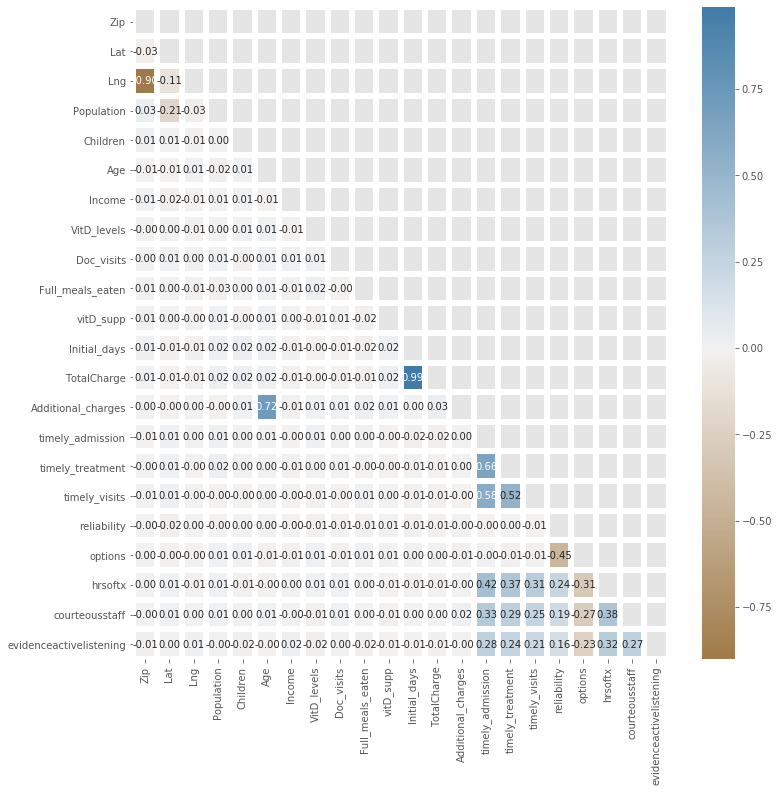

In [10]:
# visualizing the correlation matrix

cmap = sns.diverging_palette(h_neg=50,
                            h_pos=240,
                            as_cmap=True)

fix, ax = plt.subplots(figsize=(12,12))
sns.heatmap(med.corr(), mask=mask, center=0, cmap=cmap, linewidths=5, annot=True, fmt=".2f", ax=ax)

In [11]:
#display datatypes for each column to identify continuous variables
med.dtypes

Customer_id                 object
Interaction                 object
UID                         object
City                        object
State                       object
County                      object
Zip                          int64
Lat                        float64
Lng                        float64
Population                   int64
Area                        object
TimeZone                    object
Job                         object
Children                     int64
Age                          int64
Income                     float64
Marital                     object
Gender                      object
ReAdmis                     object
VitD_levels                float64
Doc_visits                   int64
Full_meals_eaten             int64
vitD_supp                    int64
Soft_drink                  object
Initial_admin               object
HighBlood                   object
Stroke                      object
Complication_risk           object
Overweight          

In [12]:
# drop categorical columns

KMeans_cat_cols = med.select_dtypes(include='object')

KMeans_cat_cols

,Customer_id,Interaction,UID,City,State,County,Area,TimeZone,Job,Marital,...,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,Suburban,America/Chicago,"Psychologist, sport and exercise",Divorced,...,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,Urban,America/Chicago,Community development worker,Married,...,Yes,No,No,No,No,No,No,Yes,No,Intravenous
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,Suburban,America/Chicago,Chief Executive Officer,Widowed,...,Yes,No,Yes,No,No,No,No,No,No,Blood Work
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,Suburban,America/Chicago,Early years teacher,Married,...,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,Rural,America/New_York,Health promotion specialist,Widowed,...,No,No,No,Yes,No,No,Yes,No,No,CT Scan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,Urban,America/New_York,"Programmer, multimedia",Widowed,...,No,No,No,No,No,Yes,No,Yes,No,Intravenous
9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,Urban,America/New_York,"Restaurant manager, fast food",Widowed,...,Yes,Yes,Yes,No,No,No,No,No,Yes,CT Scan
9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,Rural,America/Chicago,"Psychologist, occupational",Separated,...,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous


In [13]:
# Categorical Columns that will be removed for KMeans analysis
KMeans_cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer_id         10000 non-null  object
 1   Interaction         10000 non-null  object
 2   UID                 10000 non-null  object
 3   City                10000 non-null  object
 4   State               10000 non-null  object
 5   County              10000 non-null  object
 6   Area                10000 non-null  object
 7   TimeZone            10000 non-null  object
 8   Job                 10000 non-null  object
 9   Marital             10000 non-null  object
 10  Gender              10000 non-null  object
 11  ReAdmis             10000 non-null  object
 12  Soft_drink          10000 non-null  object
 13  Initial_admin       10000 non-null  object
 14  HighBlood           10000 non-null  object
 15  Stroke              10000 non-null  object
 16  Complication_risk   10

# Drop Categorical Columns

In [14]:
# drop categorical columns

KMeans_numeric_cols = med.select_dtypes(exclude='object')

KMeans_numeric_cols

,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,...,TotalCharge,Additional_charges,timely_admission,timely_treatment,timely_visits,reliability,options,hrsoftx,courteousstaff,evidenceactivelistening
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,35621,34.34960,-86.72508,2951,1,53,86575.93,19.141466,6,0,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,32446,30.84513,-85.22907,11303,3,51,46805.99,18.940352,4,2,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,57110,43.54321,-96.63772,17125,3,53,14370.14,18.057507,4,1,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,56072,43.89744,-93.51479,2162,0,78,39741.49,16.576858,4,1,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,23181,37.59894,-76.88958,5287,1,22,1209.56,17.439069,5,0,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,27563,36.42886,-78.23716,4762,2,25,45967.61,16.980860,4,2,...,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9997,8340,39.43609,-74.87302,1251,4,87,14983.02,18.177020,5,0,...,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9998,37171,36.36655,-87.29988,532,3,45,65917.81,17.129070,4,2,...,8276.481000,15281.210000,3,3,3,4,4,2,3,2


In [15]:
# check to make sure categorical variables were dropped

KMeans_numeric_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip                      10000 non-null  int64  
 1   Lat                      10000 non-null  float64
 2   Lng                      10000 non-null  float64
 3   Population               10000 non-null  int64  
 4   Children                 10000 non-null  int64  
 5   Age                      10000 non-null  int64  
 6   Income                   10000 non-null  float64
 7   VitD_levels              10000 non-null  float64
 8   Doc_visits               10000 non-null  int64  
 9   Full_meals_eaten         10000 non-null  int64  
 10  vitD_supp                10000 non-null  int64  
 11  Initial_days             10000 non-null  float64
 12  TotalCharge              10000 non-null  float64
 13  Additional_charges       10000 non-null  float64
 14  timely_admission      

In [16]:
# remove variables not needed to answer clustering question proposed in A1

KMeans_numeric_cols = KMeans_numeric_cols.drop(['Lat','Lng','Population', 'timely_admission','timely_treatment',
                                                'timely_visits', 'reliability', 'options', 'hrsoftx', 'courteousstaff',
                                                'evidenceactivelistening'], axis=1)

KMeans_numeric_cols

,Zip,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
CaseOrder,,,,,,,,,,,
1,35621,1,53,86575.93,19.141466,6,0,0,10.585770,3726.702860,17939.403420
2,32446,3,51,46805.99,18.940352,4,2,1,15.129562,4193.190458,17612.998120
3,57110,3,53,14370.14,18.057507,4,1,0,4.772177,2434.234222,17505.192460
4,56072,0,78,39741.49,16.576858,4,1,0,1.714879,2127.830423,12993.437350
5,23181,1,22,1209.56,17.439069,5,0,2,1.254807,2113.073274,3716.525786
...,...,...,...,...,...,...,...,...,...,...,...
9996,27563,2,25,45967.61,16.980860,4,2,1,51.561220,6850.942000,8927.642000
9997,8340,4,87,14983.02,18.177020,5,0,0,68.668240,7741.690000,28507.150000
9998,37171,3,45,65917.81,17.129070,4,2,0,70.154180,8276.481000,15281.210000


# Standardize Continuous Variables

In [17]:
# Standardize dataset
# Remove variables that are not treatment related 'Children', 'Zip', 'VitD_levels', 'Full_meals_eaten', 'vitD_supp'

d = KMeans_numeric_cols[['Age','Income','Doc_visits','Initial_days', 'TotalCharge','Additional_charges']]
d.head()

,Age,Income,Doc_visits,Initial_days,TotalCharge,Additional_charges
CaseOrder,,,,,,
1,53,86575.93,6,10.585770,3726.702860,17939.403420
2,51,46805.99,4,15.129562,4193.190458,17612.998120
3,53,14370.14,4,4.772177,2434.234222,17505.192460
4,78,39741.49,4,1.714879,2127.830423,12993.437350
5,22,1209.56,5,1.254807,2113.073274,3716.525786


In [18]:
# Create the object

scaler = StandardScaler()

# calculate the mean to subtract and divide by the standard deviation

scaler.fit(d)
med_scaled = scaler.transform(d)

print(med_scaled)

[[-0.02479466  1.61591429  0.94464652 -0.9073098  -0.72718477  0.76500534]
 [-0.1217056   0.22144303 -0.96798057 -0.73459473 -0.51322759  0.71511362]
 [-0.02479466 -0.91586974 -0.96798057 -1.12829151 -1.31998284  0.6986353 ]
 ...
 [-0.4124384   0.89156936 -0.96798057  1.3569578   1.35959679  0.35869505]
 [-0.50934933 -0.37827063 -0.01166703  1.09858493  1.06972732 -0.78762373]
 [ 0.79894828  0.77813279 -0.01166703  1.38342919  1.18121275 -0.19738374]]


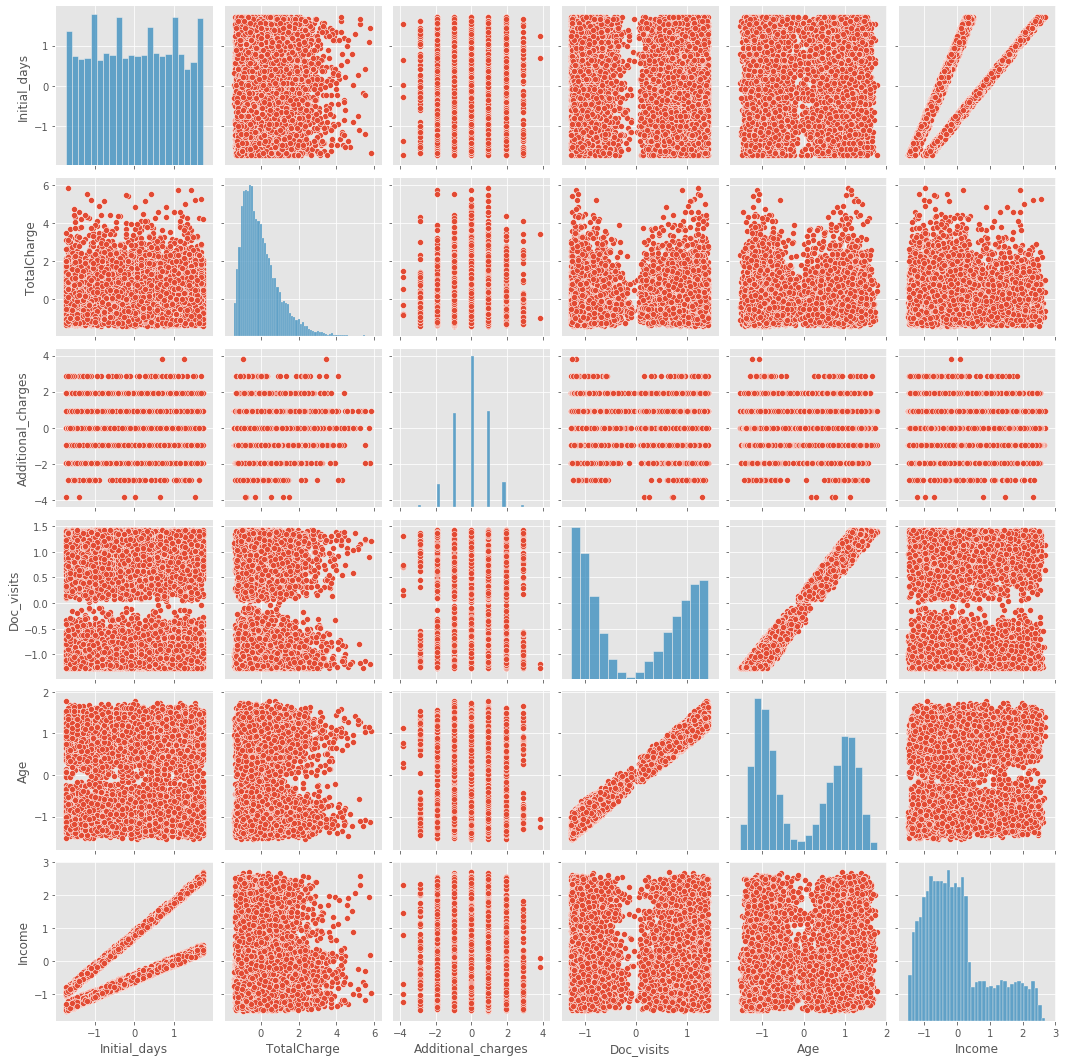

In [22]:
# start comparing data

sns.pairplot(med_scaled_df)

In [23]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 10000 non-null  int64  
 1   Income              10000 non-null  float64
 2   Doc_visits          10000 non-null  int64  
 3   Initial_days        10000 non-null  float64
 4   TotalCharge         10000 non-null  float64
 5   Additional_charges  10000 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 546.9 KB


# Create dataframe with standardized Continuous Variables

In [21]:
# created dataframe for scaled data

med_scaled_df = pd. DataFrame(med_scaled, 
          columns={'Age','Income','Doc_visits','Initial_days', 'TotalCharge','Additional_charges'})
med_scaled_df

,Initial_days,TotalCharge,Additional_charges,Doc_visits,Age,Income
0,-0.024795,1.615914,0.944647,-0.907310,-0.727185,0.765005
1,-0.121706,0.221443,-0.967981,-0.734595,-0.513228,0.715114
2,-0.024795,-0.915870,-0.967981,-1.128292,-1.319983,0.698635
3,1.186592,-0.026263,-0.967981,-1.244503,-1.460517,0.009004
4,-1.526914,-1.377325,-0.011667,-1.261991,-1.467285,-1.408991
...,...,...,...,...,...,...
9995,-1.381548,0.192047,-0.967981,0.650217,0.705765,-0.612461
9996,1.622691,-0.894380,-0.011667,1.300475,1.114312,2.380307
9997,-0.412438,0.891569,-0.967981,1.356958,1.359597,0.358695
9998,-0.509349,-0.378271,-0.011667,1.098585,1.069727,-0.787624


In [ ]:
#send standardized dataset to an excel spreadsheet

#med_scaled_df.to_excel(path + 'D212_KMeansscaledData_JCain.xlsx', index=False)

# Explore Standardized Continuous Variables Dataset

In [24]:
#display mean, count, min, and max for each column

med_scaled_df.describe()

,Initial_days,TotalCharge,Additional_charges,Doc_visits,Age,Income
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,1.126321e-16,2.446932e-17,3.032075e-16,-2.197376e-15,-3.853362e-16,-1.170175e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.720736e+00,-1.414334e+00,-3.836921e+00,-1.271601e+00,-1.547440e+00,-1.499299e+00
25%,-8.485376e-01,-7.325358e-01,-9.679806e-01,-1.009543e+00,-9.782202e-01,-7.563181e-01
50%,-2.479466e-02,-2.356991e-01,-1.166703e-02,5.249140e-02,-4.504951e-02,-2.079630e-01
75%,8.474037e-01,4.840827e-01,9.446465e-01,1.015117e+00,9.849754e-01,4.114718e-01
max,1.719602e+00,5.847132e+00,3.813587e+00,1.426416e+00,1.774335e+00,2.695017e+00


In [25]:
# Visualizing the correlation matrix

corr = med_scaled_df.corr()

mask2 = np.triu(np.ones_like(corr, dtype=bool))

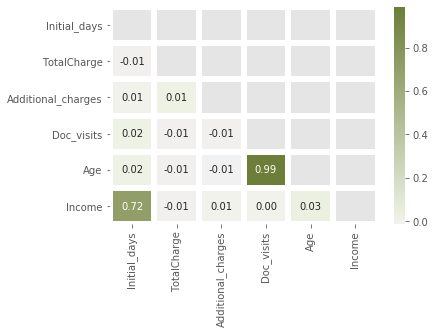

In [26]:
# visualizing the correlation matrix

cmap = sns.diverging_palette(h_neg=10,
                            h_pos=100,
                            as_cmap=True)

sns.heatmap(med_scaled_df.corr(), mask=mask2, center=0, cmap=cmap, linewidths=5, annot=True, fmt=".2f")

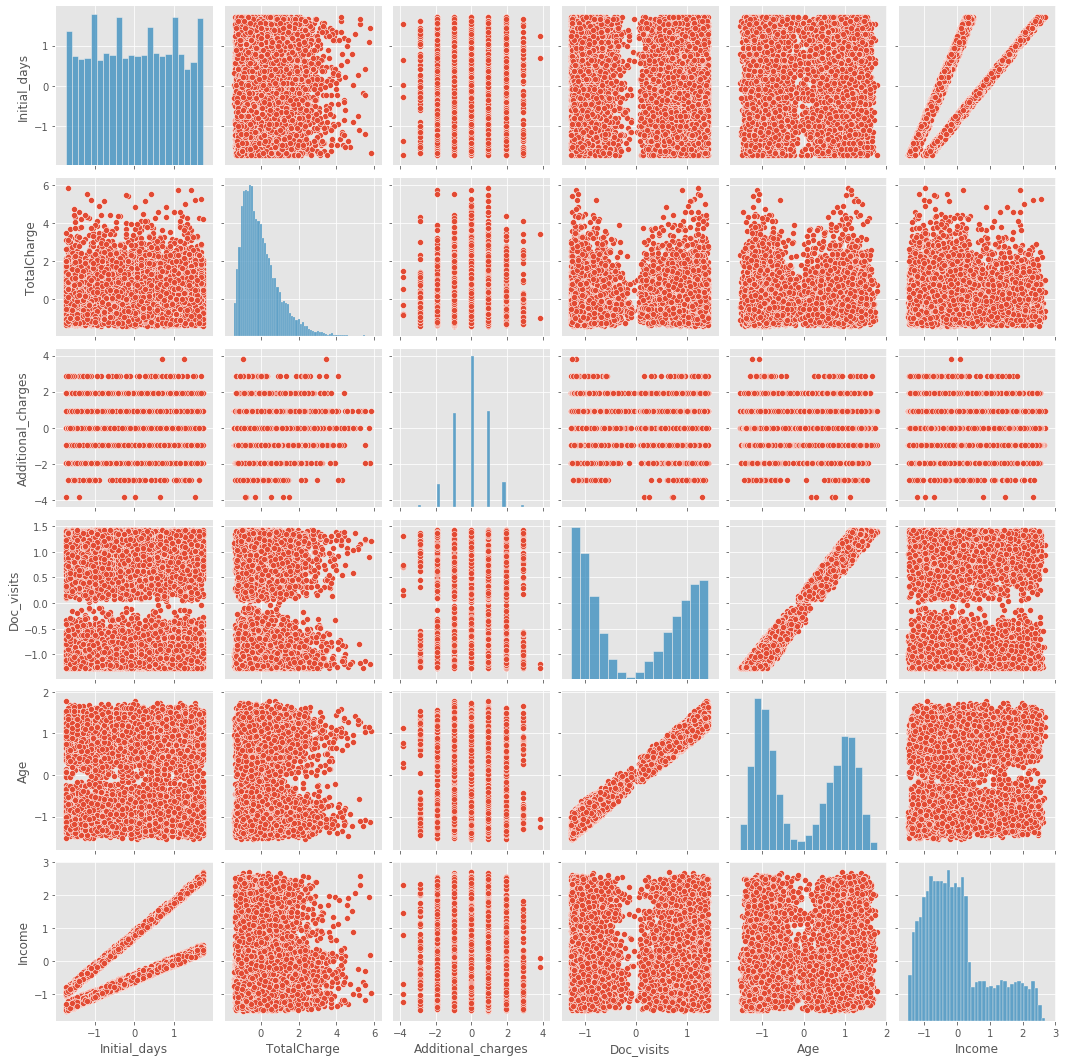

In [27]:
# start comparing data

sns.pairplot(med_scaled_df)

# Perform KMeans on Standardized Dataset

In [28]:
kmeans_scaled = cluster.KMeans(n_clusters=2, init='k-means++')
kmeans_scaled_med = kmeans_scaled.fit(med_scaled_df)

In [29]:
kmeans_scaled_med.cluster_centers_

array([[-0.0156172 ,  0.00877433,  0.01090197, -0.95882754, -0.94708304,
        -0.00636763],
       [ 0.0156172 , -0.00877433, -0.01090197,  0.95882754,  0.94708304,
         0.00636763]])

# Add cluster labels to the dataset

In [30]:
med_scaled_df['Clusters'] = kmeans_scaled.labels_
med_scaled_df.head()

,Initial_days,TotalCharge,Additional_charges,Doc_visits,Age,Income,Clusters
0,-0.024795,1.615914,0.944647,-0.907310,-0.727185,0.765005,0
1,-0.121706,0.221443,-0.967981,-0.734595,-0.513228,0.715114,0
2,-0.024795,-0.915870,-0.967981,-1.128292,-1.319983,0.698635,0
3,1.186592,-0.026263,-0.967981,-1.244503,-1.460517,0.009004,0
4,-1.526914,-1.377325,-0.011667,-1.261991,-1.467285,-1.408991,0


In [31]:
# Get cluster counts
med_scaled_df['Clusters'].value_counts()

1    5000
0    5000
Name: Clusters, dtype: int64

In [32]:
# Standardized data loop

sse_standardized = []
k_rng_standardized = range(1,12)
for k_s in k_rng_standardized:
    km_standardized = KMeans(n_clusters=k_s)
    km_standardized.fit(med_scaled_df)
    sse_standardized.append(km_standardized.inertia_)

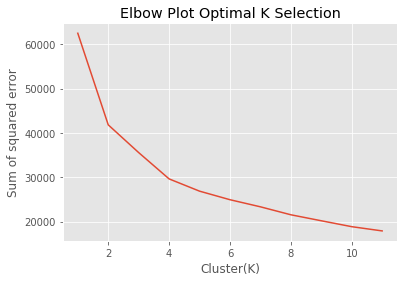

In [33]:
# Standardized data elbow plot

plt.title('Elbow Plot Optimal K Selection')
plt.xlabel('Cluster(K)')
plt.ylabel('Sum of squared error')
plt.plot(k_rng_standardized,sse_standardized)

In [34]:
# Calculate Silhoutte Score

score = metrics.silhouette_score(med_scaled_df, kmeans_scaled_med.labels_, metric='euclidean')

# Print the score

print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.326


# Visualizing Clusters

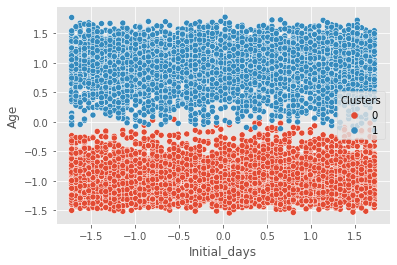

In [35]:
sns.scatterplot(x='Initial_days', y= 'Age', hue = 'Clusters', data=med_scaled_df)

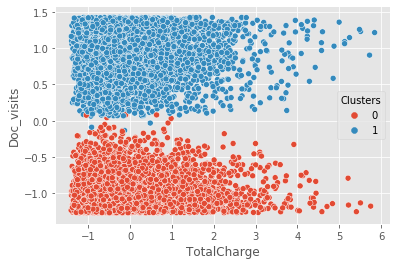

In [36]:
sns.scatterplot(x='TotalCharge', y= 'Doc_visits', hue = 'Clusters', data=med_scaled_df)